In [1]:
%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 292 kB 17.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
# df = pd.read_csv('googleplaystore.csv')

In [3]:
# load_dataset()
def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df

df = load_dataset()

In [4]:
# print_summarize_dataset(dataset)
def print_summarize_dataset(dataset):
    print("Size of the Dataset:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Describe dataset:")
    print(dataset.describe())
    
print_summarize_dataset(df)

Size of the Dataset:
(10841, 13)
First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# clean_dataset(dataset)
def clean_dataset(dataset):
    # Cleaning Price column
    dataset['Price'] = dataset['Price'].apply(lambda x: x.replace('$',''))
    df.drop(df[df['Price']=='Everyone'].index, inplace=True)
    dataset['Price'] = dataset['Price'].astype(float)
    # Cleaning nan values of Content Rating 
    dataset.dropna(subset=['Content Rating'], inplace=True)
    dataset['Genres'] = dataset['Genres'].apply(lambda x: x.replace(';',''))
    # Cleaning Installs column
    dataset['Installs'] = dataset['Installs'].apply(lambda x: str(x).replace('+','').replace(',',''))
    dataset['Installs'] = dataset['Installs'].astype(int)
    # dataset['Rating'] = dataset['Rating'].fillna(value=dataset['Rating'].mode()[0], inplace=True)
    dataset['Reviews']= dataset['Reviews'].astype(int)
    # cleaning Size column
    dataset['Size'] = dataset['Size'].apply(lambda x: str(x).replace(',', '').replace('k','').replace('M',''))
    dataset['Size']= dataset.Size.replace('Varies with device','')
    dataset.dropna(subset=['Size'], inplace=True)
    return dataset

df = clean_dataset(df)
    
df = df.drop(columns=['Current Ver','Android Ver'])

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

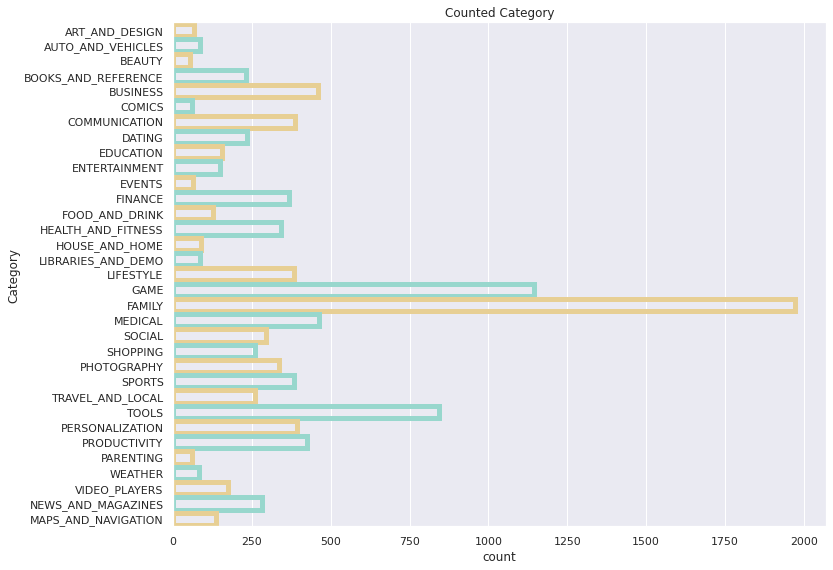

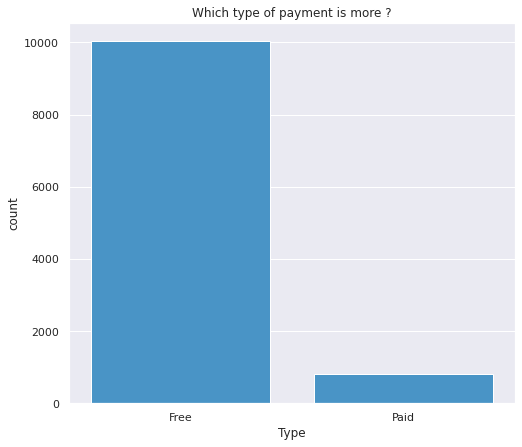

In [8]:
sns.set(rc={'figure.figsize':(11.7,9.27)})
# print_histograms(dataset)
def print_histograms(dataset):
    # plot = dataset['Category'].value_counts()
    # plot.plot(kind='bar')
    #Plot a bar with the counted number per category
    sns.countplot(y ='Category', data =dataset,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2))
    plt.title('Counted Category')
    
    #Plot a bar with the counted number of type 
    plt.figure(figsize=(8,7))
    sns.countplot(x='Type', data=dataset, color='#3498db')
    plt.title('Which type of payment is more ?')
    
print_histograms(df)   

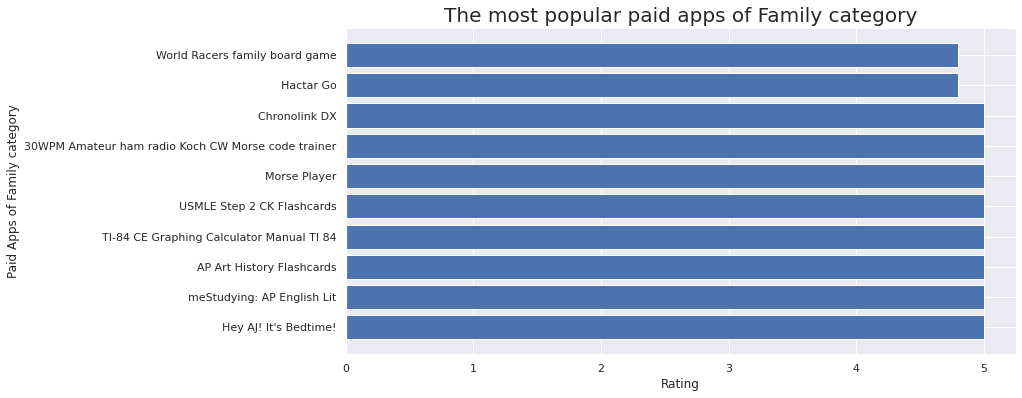

In [9]:
# Plot with bar diagram the most populars paid apps of Family category
def most_popular_paid_apps_of_Family_category(dataset):
    most_paid = dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid'), ['App', 'Rating']]
    the_most_paid = dict(most_paid.nlargest(10, 'Rating').values)
    xval, yval = list(the_most_paid.keys()), list(the_most_paid.values())

    fig = plt.figure(figsize = (12, 6))
    plt.barh(xval,yval)
    plt.title('The most popular paid apps of Family category', fontsize = 20)
    plt.ylabel('Paid Apps of Family category')
    plt.xlabel('Rating')
    plt.show()
    
most_popular_paid_apps_of_Family_category(df)

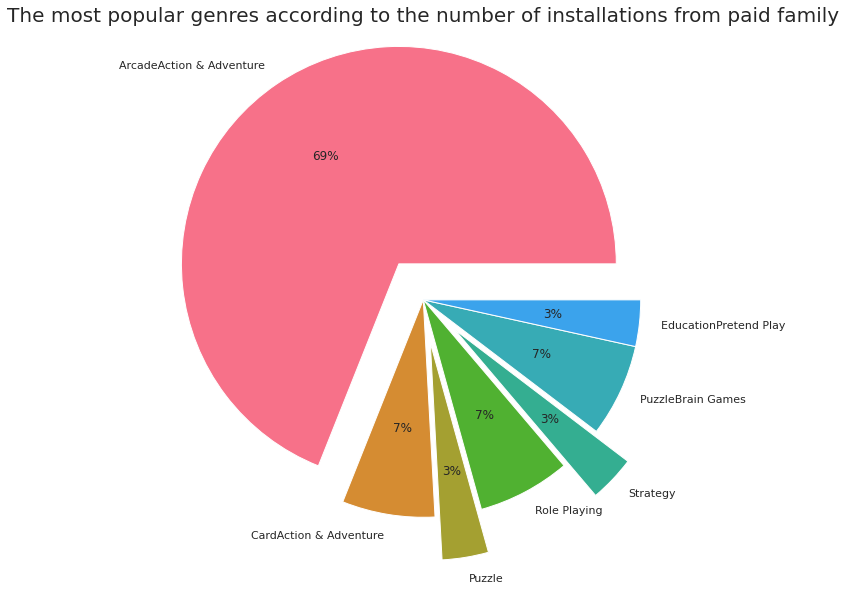

In [10]:
# Plot with a pie diagram the most popular genres according to the number of installations from paid family
def most_popular_genres_installations(dataset):
    popular = dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid'), ['Genres', 'Installs']]
    the_popular = dict(popular.nlargest(10, 'Installs').values)
    X_value, Y_value= list(the_popular.keys()), list(the_popular.values())
    explode = (0.2, 0, 0.2, 0, 0.2, 0, 0)
    
    fig = plt.figure(figsize = (16, 10))
    palette_color = sns.color_palette("husl", 9)
    plt.title('The most popular genres according to the number of installations from paid family', fontsize = 20)
    plt.pie(Y_value, labels=X_value, colors=palette_color, explode=explode, autopct='%.0f%%')
    plt.show()
    
most_popular_genres_installations(df)

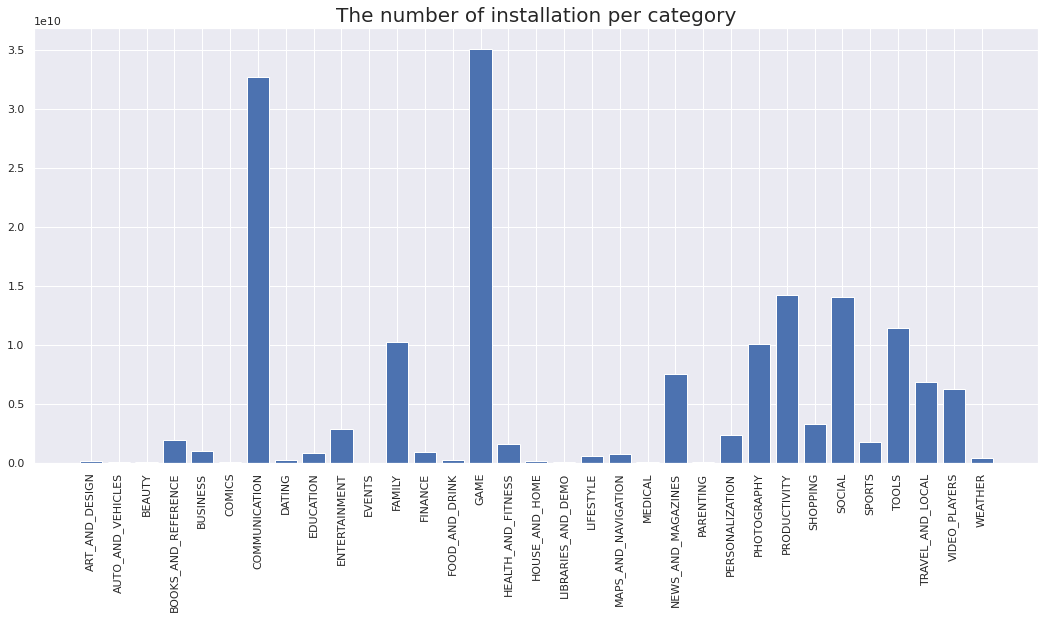

In [11]:
# An array with the number of installation per category
def number_of_installation_per_category(dataset):
    plt.figure(figsize=(18, 8))
    
    data = dataset.groupby('Category',as_index=False)[['Installs']].sum()
    data['Installs'].sort_values(ascending=False)
    Categoty = data['Category'].values.tolist()
    plt.xticks(rotation=90)
    plt.title('The number of installation per category', fontsize = 20)
    plt.bar(Categoty, data.Installs.values.tolist(), linestyle='solid')
    plt.show()
    
number_of_installation_per_category(df)

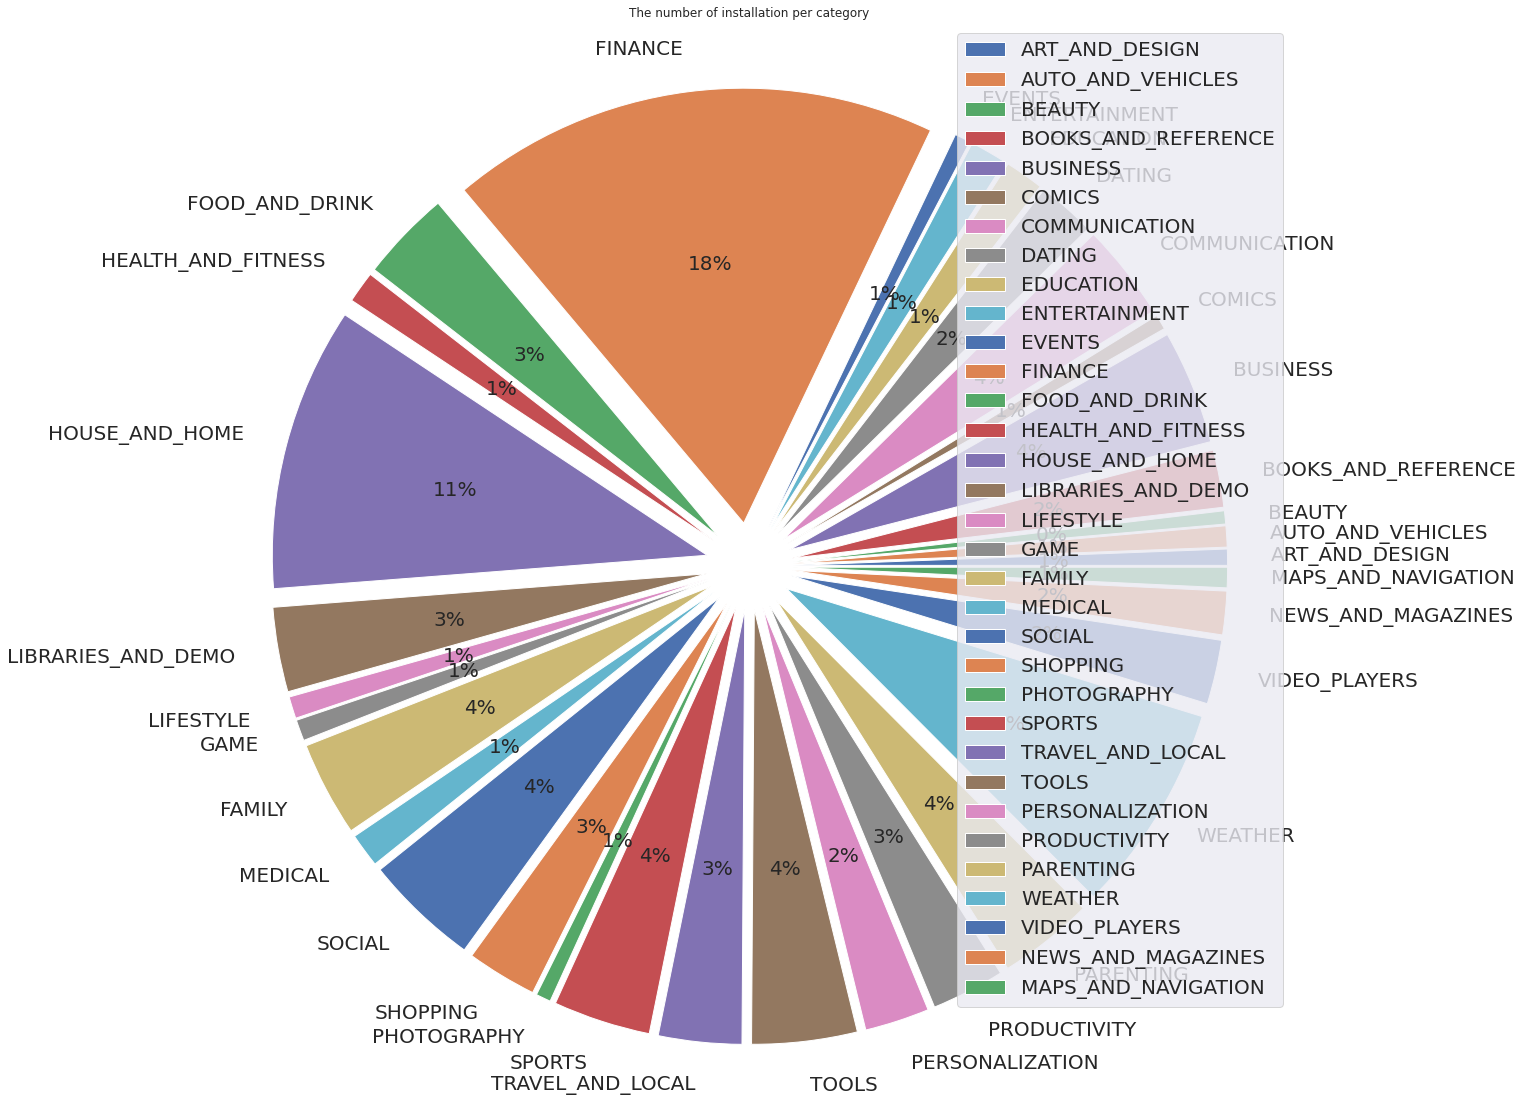

In [12]:
# Plot a pie with the number of installation per category
def number_of_installation_per_category(dataset):
    plt.figure(figsize=(40, 20))
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
    
    data = dataset.groupby("Category").count()
    plt.pie(data["Installs"], labels=dataset["Category"].unique(), autopct='%.0f%%', explode=explode, textprops = {"fontsize":20})
    plt.title('The number of installation per category')
    plt.legend(prop={'size' : 20}, loc='upper right');
    
number_of_installation_per_category(df)

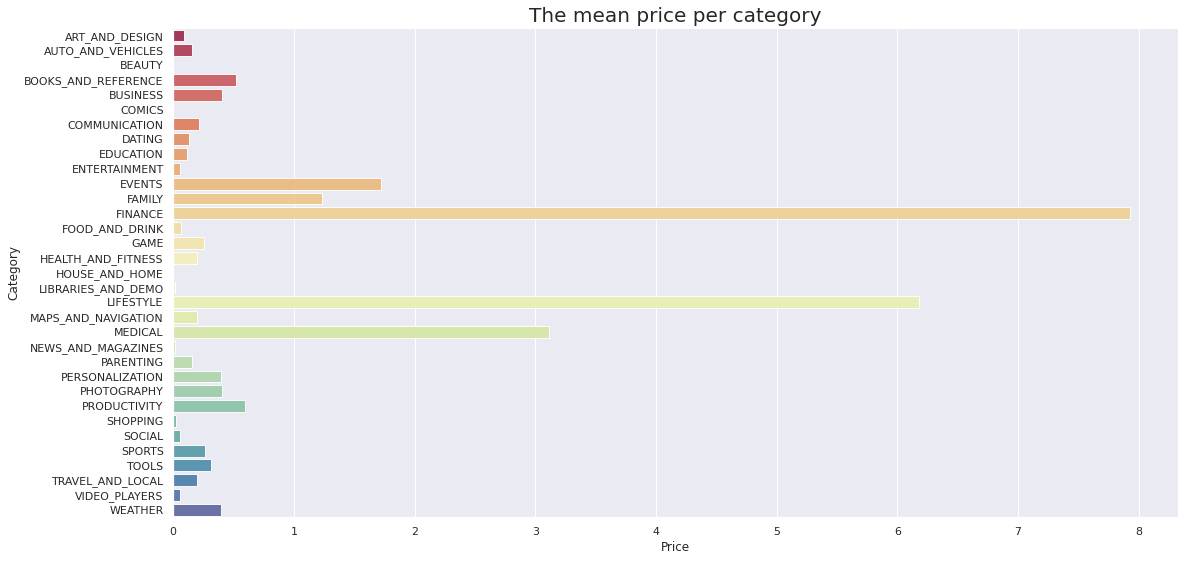

In [13]:
# Plot a bar with the mean price per category
def mean_price_per_category(dataset):
    plt.figure(figsize=(18, 9))
    data = dataset.groupby('Category', as_index=False)[['Price']].mean()
    data['Price'].sort_values(ascending=False)

    plt.xlabel("Price")
    plt.ylabel("Category")
    sns.barplot(x=data.Price.values.tolist(), y=data.Category.values.tolist(), alpha=0.9, palette="Spectral")
    plt.title("The mean price per category", fontsize=20);

mean_price_per_category(df)

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versi

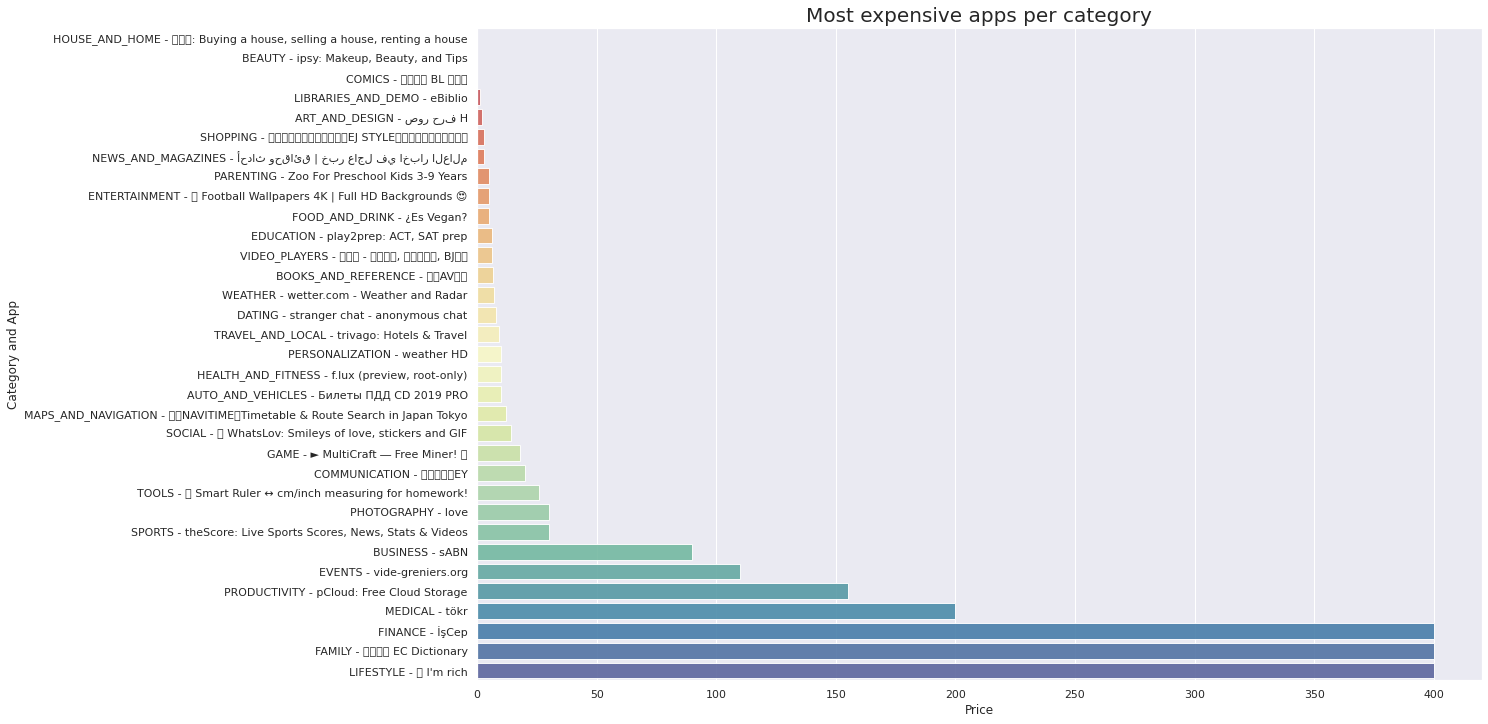

In [14]:
# Most expensive apps per category
def Most_expensive_apps_per_category(dataset):
    plt.figure(figsize=(18, 12))
    data = dataset.groupby('Category', as_index=False)[['App','Price']].max()
    data.sort_values('Price',inplace=True)
    Category = data['Category & Apps'] = data['Category'].astype(str) +" - "+ data["App"]
    Category = data['Category & Apps'].values.tolist()

    plt.xlabel("Price")
    plt.ylabel("Category and App")
    sns.barplot(x = data.Price.values.tolist(), y =Category, alpha =0.9, palette="Spectral")
    plt.title('Most expensive apps per category', fontsize=20)
    plt.show()
    
Most_expensive_apps_per_category(df)

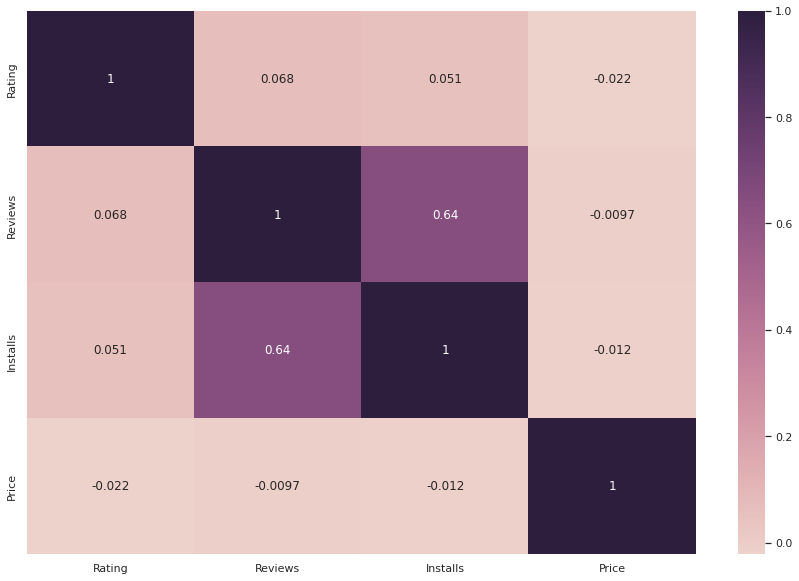

In [15]:
# compute_correlations_matrix(dataset)
def compute_correlations_matrix(dataset):
    
    coor = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(coor, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.show()

compute_correlations_matrix(df)

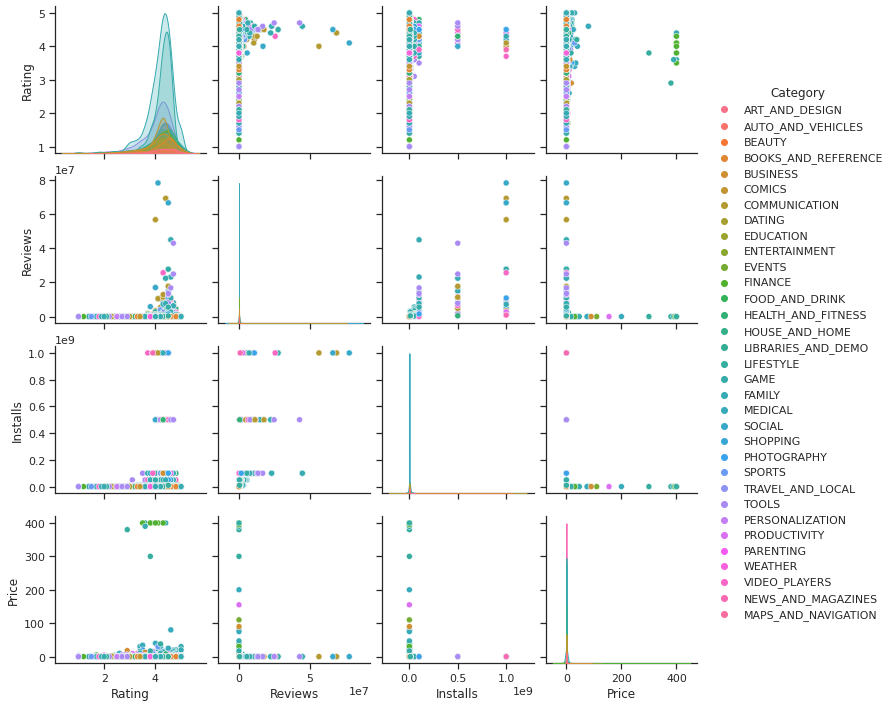

In [18]:
# print_scatter_matrix(dataset)
def print_scatter_matrix(dataset):
    
    sns.set_theme(style='ticks')
    sns.pairplot(dataset, hue='Category')
    plt.show()
    
print_scatter_matrix(df)